# Using LSTM to predict SP500 Stocks
Using old stock data from SP500 we will try to predict the next days stock value.

In [4]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import lstm, time

## Split the data into Training and Testing sets

In [5]:
x_train, y_train, x_test, y_test = lstm.load_data('sp500.csv', 50, True)

## Build the simple Sequential Model

In [6]:
stock_model = Sequential()

stock_model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
stock_model.add(Dropout(0.2))

stock_model.add(LSTM(
    100,
    return_sequences=False))
stock_model.add(Dropout(0.2))

stock_model.add(Dense(
    output_dim=1))
stock_model.add(Activation('linear'))

start = time.time()
stock_model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.07284116745


## Train the model

In [7]:
stock_model.fit(
x_train,
y_train,
batch_size=512,
nb_epoch=1,
validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 12s - loss: 0.0023 - val_loss: 8.9988e-04


# Make that Predition!

yo


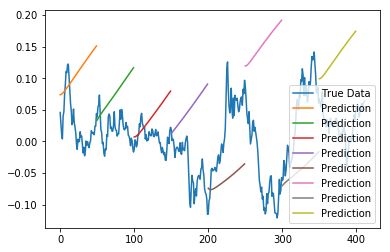

In [9]:
prediction = lstm.predict_sequences_multiple(stock_model, x_test, 50, 50)
lstm.plot_results_multiple(prediction, y_test, 50)